# DIP Assignment 1

### Requirements :-
##### Libraries:-
* Numpy
* os
* Python 3.x
* scikit-image
* matplotlib
* math
* mpl_toolkits.axes_grid1

### To run this notebook successfully, please ensure the following steps.
* Ensure that all the libraries mentioned above are installed
* Ensure that in the current working directory the folder **A1_resources** and its entire folder structure exists and is maintained. **This is the input data to notebook.**
* Ensure that the folder **DIP_2019_A1**exists inside the folder **A1_resources**


###### Note:-
* ***If any of the steps are missing/files are missing, then some parts of the code may or may not work***
* *The Results folder contains some outputs saved from the script*

In [1]:
# Importing libraries
import numpy as np
import os
import skimage
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

In [2]:
# Import resources
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/bg.jpg')
bg = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/fg.jpg')
fg = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/eye.png')
eye = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/eyeref.png')
eyeref = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/cameraman.png')
cameraman = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/quantize.jpg')
quantize = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/lena.jpg')
lena = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/gamma-corr.png')
gammacorr = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/university.png')
university = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/group.png')
group = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/part1.png')
part1 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/part2.png')
part2 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/part3.png')
part3 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/part4.png')
part4 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/canyon.png')
canyon = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/histuneq.jpg')
histuneq = io.imread(file)

In [3]:
# RGB to greyscale
def rgb2gray(image):
    '''
    A function that takes in input an image and returns its greyscale version
    '''
    if (len(image.shape)==2):
        return image
    elif (len(image.shape)==3):
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
        output = 0.2989 * r + 0.5870 * g + 0.1140 * b
        return output.astype('uint8')

# Question 1

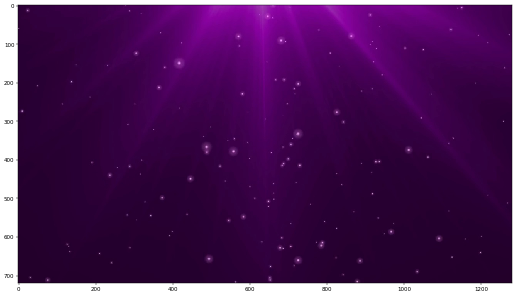

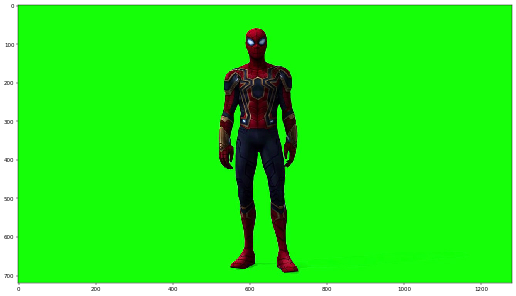

In [4]:
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(bg)
plt.figure(2,figsize=[13,13],dpi = 40)
io.imshow(fg)

**Part 1** *Write a function that takes a color image and finds the most frequently occurring
color from the image*

In [5]:
def mostFreqColor(image):
    """
    This function takes an image and returns the most frequently occuring color from the image
    """
    red_ch = image[:,:,0]
    green_ch = image[:,:,1]
    blue_ch = image[:,:,2]
    
    hist_r, bins = np.histogram(red_ch, bins = np.arange(0,256,1))
    
    hist_g, bins = np.histogram(green_ch, bins = np.arange(0,256,1))
    
    hist_b, bins = np.histogram(blue_ch, bins = np.arange(0,256,1))
    
    r_max_loc = np.where(hist_r == np.amax(hist_r))
    g_max_loc = np.where(hist_g == np.amax(hist_g))
    b_max_loc = np.where(hist_b == np.amax(hist_b))
    
    out = np.array([r_max_loc[0], g_max_loc[0], b_max_loc[0]])
    
    return out

In [6]:
output = mostFreqColor(fg)
print(output)

[[ 21]
 [254]
 [  8]]


**Part 2** *Write a function mergeImage which takes two images fg and bg that extracts the
foreground object and places it in the background and returns the resultant image.*

In [7]:
def mergeImage(fg, bg, threshold=150):
    """
    This function takes in two images, fg and bg, i.e. foreground and background and separates the Object
    of Interest in foreground and merges into the background. The parameter threshold controls the quality
    of merging, i.e., shadows, borders, color
    """
    red_ch_fg = fg[:,:,0]
    green_ch_fg = fg[:,:,1]
    blue_ch_fg = fg[:,:,2]
    
    red_ch_bg = bg[:,:,0]
    green_ch_bg = bg[:,:,1]
    blue_ch_bg = bg[:,:,2]
    mask = mostFreqColor(fg)
    output = bg
    for i in range(0, fg.shape[0], 1):
            for j in range(0,fg.shape[1],1):
                        dist = sqrt((red_ch_fg[i,j]-mask[0])**2+(green_ch_fg[i,j]-mask[1])**2+(blue_ch_fg[i,j]-mask[2])**2)
                        if dist > threshold:
                            output[i,j,:] = fg[i,j,:]                      
    return output

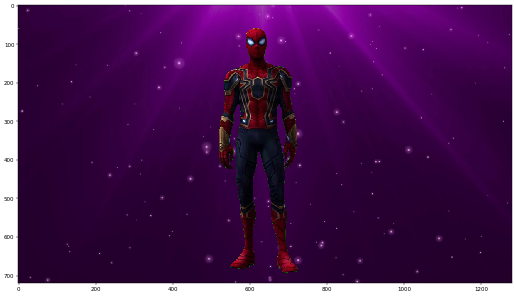

In [8]:
output = mergeImage(fg, bg)
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(output)
io.imsave("result.jpg",output)

**Part 3** *Try out with different foreground and background images of your choice and show
the results*

In [9]:
#Assets for part 3
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/bg1.jpg')
bg1 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/fg1.jpg')
fg1 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/bg2.jpg')
bg2 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/fg2.jpg')
fg2 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/bg3.jpg')
bg3 = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/fg3.jpeg')
fg3 = io.imread(file)

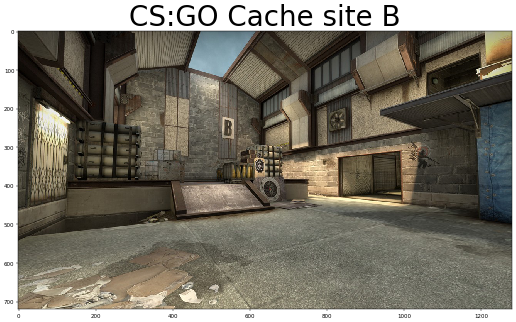

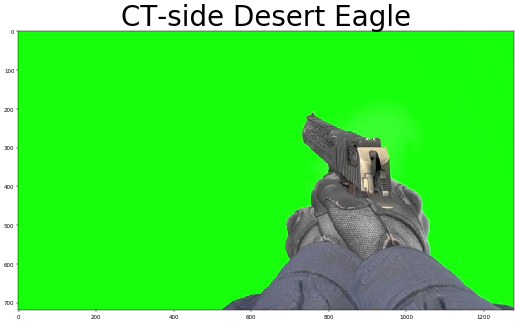

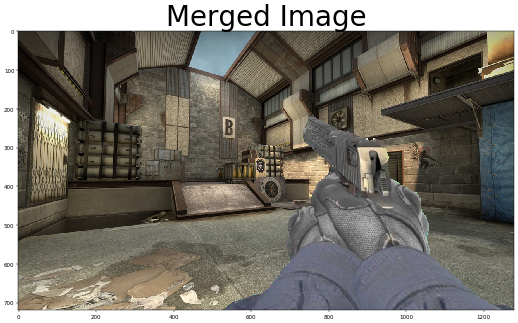

In [10]:
#Example 1
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(bg1)
plt.title('CS:GO Cache site B',fontsize = 50)
plt.figure(2,figsize=[16,16],dpi = 40)
plt.imshow(fg1)
plt.title('CT-side Desert Eagle',fontsize=50)
output = mergeImage(fg1, bg1, 180)
plt.figure(3,figsize=[16,16],dpi = 40)
plt.imshow(output)
plt.title('Merged Image',fontsize=50)
io.imsave("result1.jpg",output)

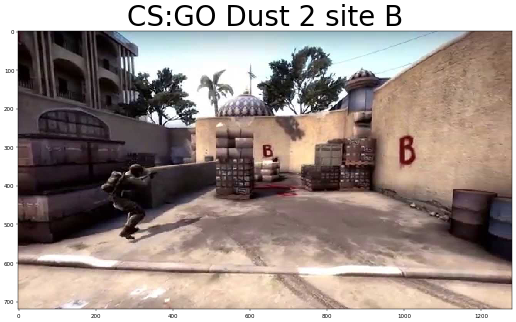

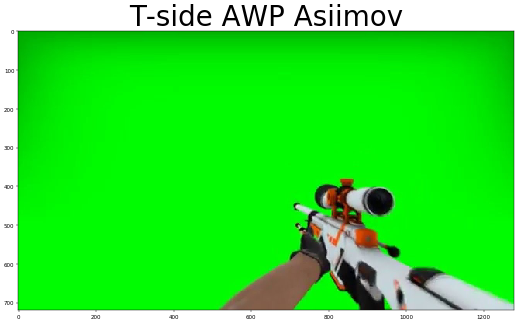

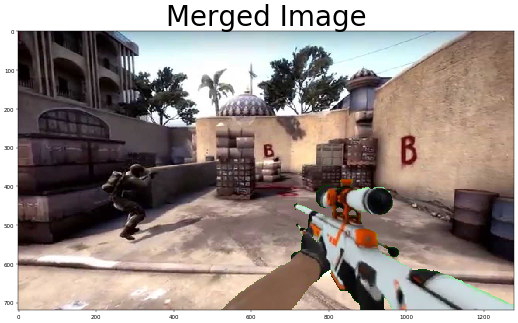

In [11]:
#Example 2
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(bg2)
plt.title('CS:GO Dust 2 site B',fontsize = 50)
plt.figure(2,figsize=[16,16],dpi = 40)
plt.imshow(fg2)
plt.title('T-side AWP Asiimov',fontsize=50)
output = mergeImage(fg2, bg2, 180)
plt.figure(3,figsize=[16,16],dpi = 40)
plt.imshow(output)
plt.title('Merged Image',fontsize=50)
io.imsave("result2.jpg",output)

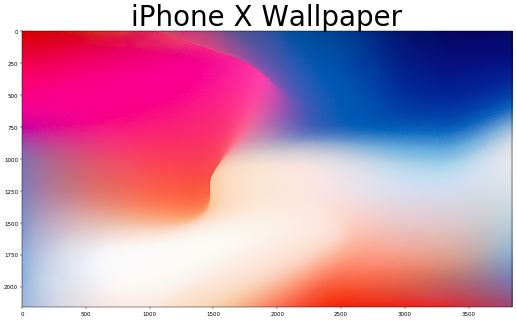

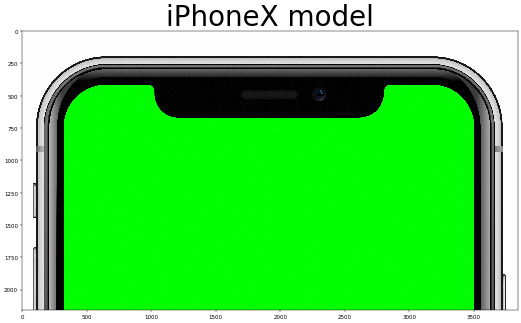

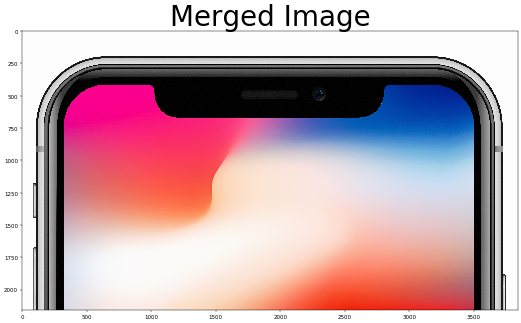

In [12]:
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(bg3)
plt.title('iPhone X Wallpaper',fontsize=50)
plt.figure(2,figsize=[16,16],dpi = 40)
plt.imshow(fg3)
plt.title('iPhoneX model',fontsize=50)
output = mergeImage(fg3, bg3)
plt.figure(3,figsize=[16,16],dpi = 40)
plt.imshow(output)
plt.title('Merged Image',fontsize=50)
io.imsave("result3.jpg",output)

# Question 2

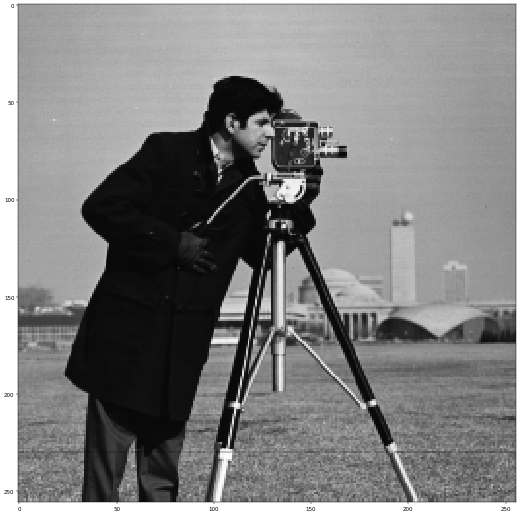

In [13]:
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(cameraman)

**Part 1** *Write a function linContrastStretching which takes a grayscale image im, a and
b that enhances the contrast such that the resulting intensity range is [a, b]*

In [14]:
def linContrastStretching(im, a, b, k = 0):
    """
    A function that takes in an input greyscale image and outputs an image with 
    intensities lying between a and b
    """
    in_max = np.amax(im)
    in_min = np.amin(im)
    op = np.zeros(im.shape)
    op = np.round(a+((im-in_min)/(in_max-in_min))*(b-a))
    op = op.astype('uint8')
    if (k == 0):
        return op
    else:
        im_hist, im_bins = np.histogram(im.flatten(), bins = np.arange(0,256,1))
        op_hist, op_bins = np.histogram(op.flatten(), bins = np.arange(0,256,1))
        
        im_store_freq = {}
        op_store_freq = {}

        im_colorbar = np.zeros([k, 1])
        op_colorbar = np.zeros([k, 1])
        
        for i in range(0,255,1):
            im_store_freq[i] = im_hist[i]
            op_store_freq[i] = op_hist[i]
            
        im_keys = sorted(im_store_freq, reverse=True)
        op_keys = sorted(op_store_freq, reverse=True)
        
        im_colorbar[:,0] = (im_keys[0:k])
        op_colorbar[:,0] = (op_keys[0:k])
        return op, im_colorbar, op_colorbar

**Part 2** *Display the input image and the resultant image side-by-side along with their
colorbars (a strip containing k most frequently occurring colors). Give suitable
explanation for the resulting colorbars*

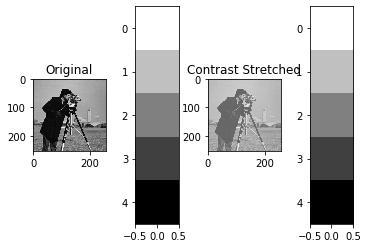

In [15]:
output, im_colorbar, op_colorbar = linContrastStretching(cameraman, 100, 240, 5)
cameraman = cameraman.astype('uint8')
output = output.astype('uint8')
fig = plt.figure(1)

ax1 = fig.add_subplot(141)
im1 = ax1.imshow(cameraman, cmap = cm.gray, vmin = 0, vmax=255)

ax2 = fig.add_subplot(142)
colIm = ax2.imshow(im_colorbar,cmap=cm.gray)

ax3 = fig.add_subplot(143)
op = ax3.imshow(output, cmap = cm.gray, vmin = 0, vmax = 255)

ax4 = fig.add_subplot(144)
colOp = ax4.imshow(op_colorbar,cmap=cm.gray)

ax1.title.set_text('Original')
ax3.title.set_text('Contrast Stretched')

### Colorbar values
* The colorbars represent the maximally occurring intensity in the greyscale image
* The shades are distributed from the maximum intensity being white and minimum intensity being black 

**Part 3** *Use your function on multiple images and argue why the effect is more on some
images while it is not that apparent on the others.*

In [16]:
#Assets
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/divine.jpg')
divine = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/beach.jpg')
beach = io.imread(file)

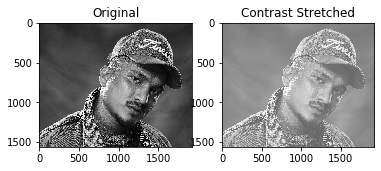

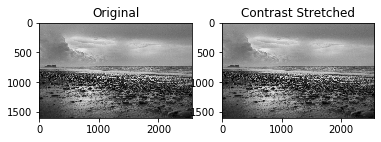

In [17]:
output = linContrastStretching(rgb2gray(divine), 100, 250)
divine = divine.astype('uint8')
output = output.astype('uint8')
fig = plt.figure(1)

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(rgb2gray(divine), cmap = 'gray', vmin = 0, vmax = 255)

ax2 = fig.add_subplot(122)
op = ax2.imshow(output, cmap = 'gray', vmin = 0, vmax = 255)


ax1.title.set_text('Original')
ax2.title.set_text('Contrast Stretched')

output = linContrastStretching(rgb2gray(beach), 100, 250)
beach = beach.astype('uint8')
output = output.astype('uint8')
fig = plt.figure(3)

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(rgb2gray(beach), cmap=cm.gray)

ax2 = fig.add_subplot(122)
op = ax2.imshow(output,cmap=cm.gray)


ax1.title.set_text('Original')
ax2.title.set_text('Contrast Stretched')

### Observation -

All Images do not have similar extent of linear Contrast stretching because :-
* In contrast stretching, there exists a one-to-one relationship of the intensity values between the source image and the target image. 
* The original image can be restored from the contrast-stretched image. 
* This mapping is different for different images, it just enhances/reduces the distance between the maximum and minimum intensity

# Question 3

Text(0.5, 1, 'Input')

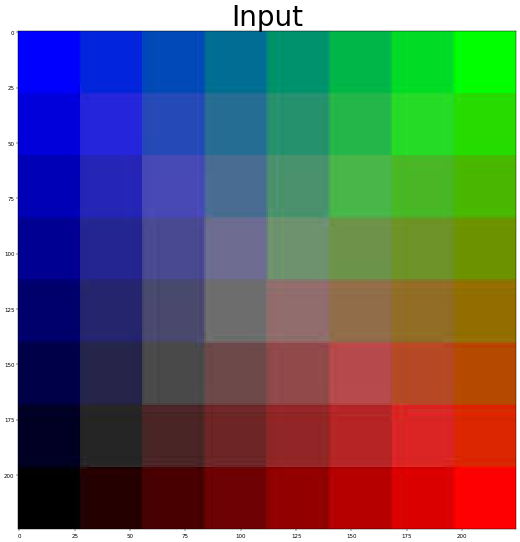

In [18]:
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(quantize)
plt.title('Input',fontsize=50)

**Part 1** *Write a function BitQuantizeImage which takes an 8-bit image im and k, the
number of bits to which the image needs to be quantized to and returns the k-bit
quantized image. Display results for the image quantize.jpg*

In [19]:
def BitQuantizeImage(im, k):
    """
    Input is an 8 bit image converted to a k-bit image by changing the bins in which intensity falls.
    This function takes in two arguments, image and no of bit levels and changes respectively a 8-level
    intensity image and converts it to (2^k)-level image
    """
    op = np.zeros(im.shape)
    op = op.astype('uint8')
    if(len(im.shape)==2):
        """Grayscale Image"""
        binSize = 256/float(2**k)
        binLocDown = np.floor(im/binSize)
        binLocUp = np.ceil(im/binSize)
        op = np.round(binSize*(binLocDown+binLocUp)/2)
        op = op.astype('uint8')
        return op
    
    elif (len(im.shape)==3):
        """Color Image"""
        rch = im[:,:,0]
        gch = im[:,:,1]
        bch = im[:,:,2]
        binSize = 256/float(2**k)
        rbinLocDown = np.floor(rch/binSize)
        gbinLocDown = np.floor(gch/binSize)
        bbinLocDown = np.floor(bch/binSize)
        op[:,:,0] = linContrastStretching(np.round(binSize*rbinLocDown),0,255)
        op[:,:,1] = linContrastStretching(np.round(binSize*gbinLocDown),0,255)
        op[:,:,2] = linContrastStretching(np.round(binSize*bbinLocDown),0,255)      
        op = op.astype('uint8')
        return op
        

Text(0.5, 1.0, '3 -Bit Quantized Input')

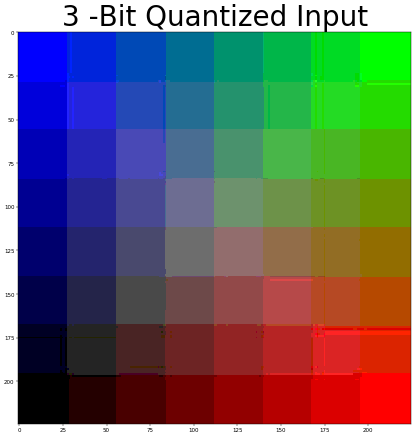

In [20]:
k = 3
output = BitQuantizeImage(quantize, k)
plt.figure(1,figsize=[13,13],dpi = 40)
plt.imshow(output, cmap = cm.gray)
plt.title('%i -Bit Quantized Input' %k, fontsize = 50)

**Part 2** *Write a code to display different bit planes of an 8-bit gray-scale image. Display
results for the image cameraman.png*

Text(0.5, 1, 'Input')

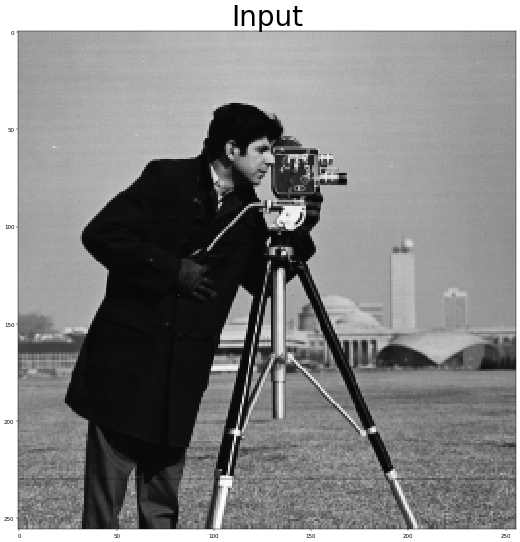

In [21]:
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(cameraman)
plt.title('Input', fontsize = 50)

In [22]:
def genBitPlanes(im):
    """
    Given a 8 bit image, generate its 8 bit planes
    """
    dim = [im.shape[0], im.shape[1], 8]
    op = np.zeros(dim)
    for k in range(0,dim[2],1):
        op[:,:,k] = im[:,:]&(2**k)
    op = op*255
    return op

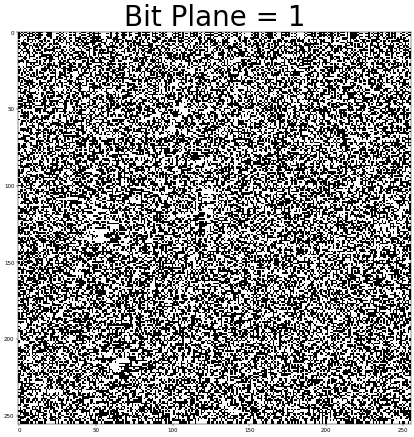

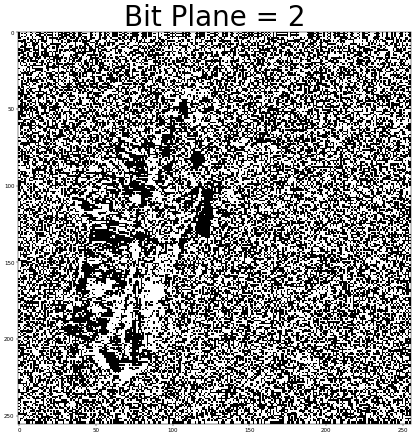

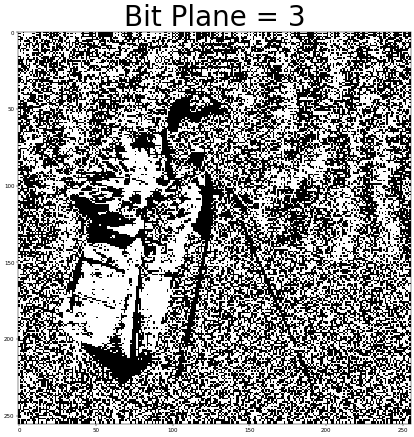

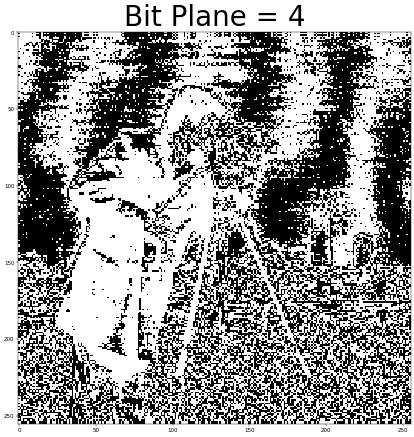

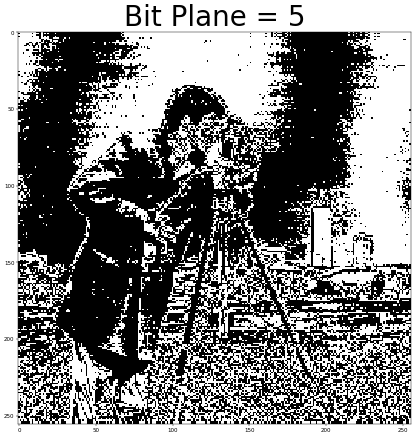

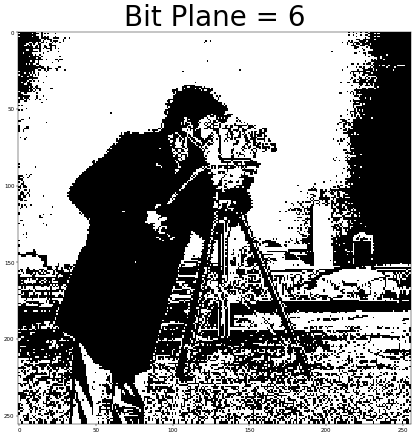

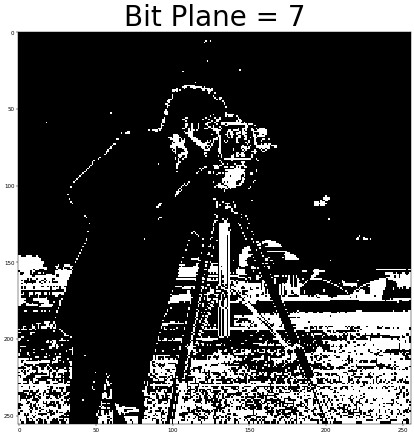

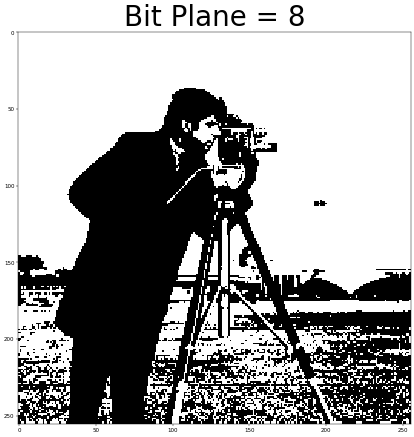

In [23]:
output = genBitPlanes(cameraman)
for i in range(0,output.shape[2],1):
    plt.figure(i, figsize=[13,13],dpi = 40)
    plt.imshow(output[:,:,i], cmap = cm.gray)
    plt.title('Bit Plane = %i' %(i+1),fontsize=50)

**Part 3** *Given original image lena.jpg identify the operations applied on the images lena1.jpg,
lena2.jpg and lena3.jpg.*

(512, 512, 3)


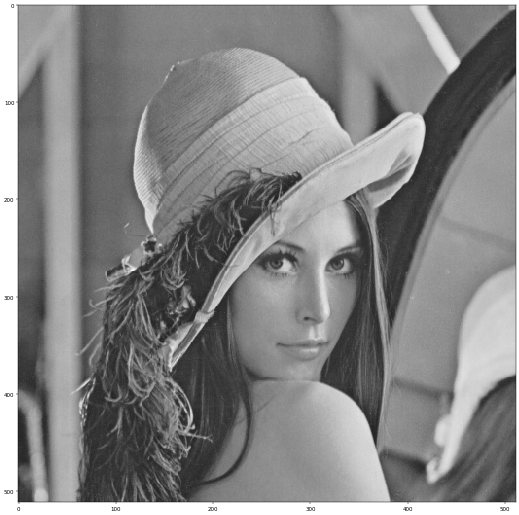

In [24]:
plt.figure(1,figsize=[13,13],dpi = 40)
io.imshow(lena)
print(lena.shape)

Text(0.5, 1.0, 'Bit Plane = 4')

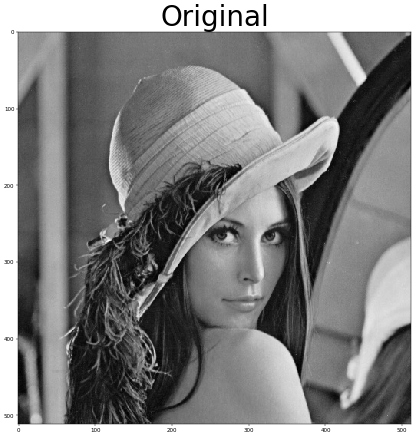

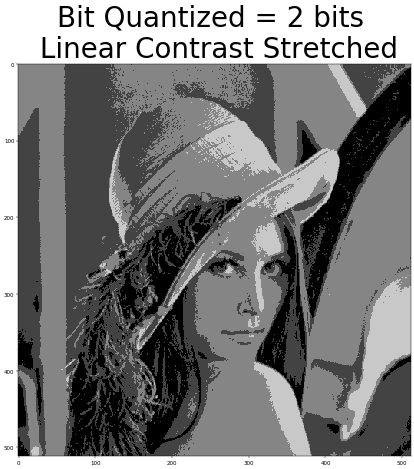

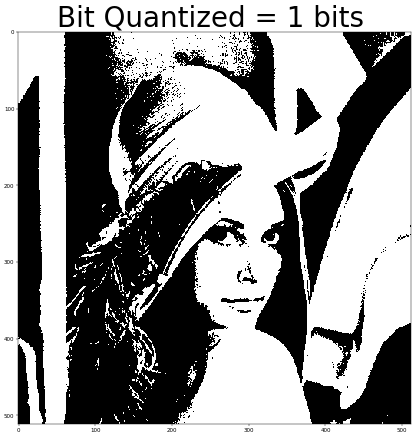

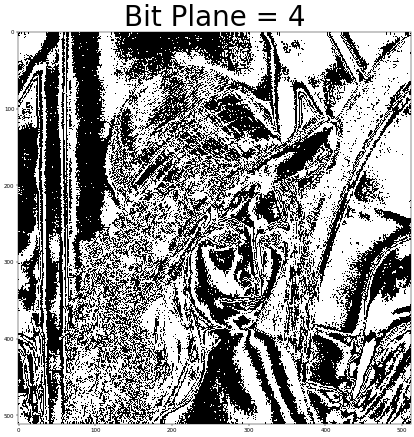

In [25]:
k1=2
output1 = linContrastStretching(BitQuantizeImage(lena, k1),0,200)
k2 = 1
output2 = BitQuantizeImage(lena, k2)
output = genBitPlanes(rgb2gray(lena))
bitplaneno = 4
output3 = output[:,:,bitplaneno]

fig = plt.figure(1, figsize=[13,13],dpi = 40)
plt.imshow(lena[:,:,0], cmap=cm.gray)
plt.title('Original',fontsize=50)

fig = plt.figure(figsize=[13,13],dpi = 40)
plt.imshow(output1.astype('uint8'), cmap=cm.gray, vmin = 0, vmax=255)
plt.title('Bit Quantized = %i bits \n Linear Contrast Stretched'%k1,fontsize=50)

fig = plt.figure(3, figsize=[13,13],dpi = 40)
plt.imshow(output2.astype('uint8'), cmap=cm.gray)
plt.title('Bit Quantized = %i bits '%k2,fontsize=50)

fig = plt.figure(4, figsize=[13,13],dpi = 40)
plt.imshow(output3, cmap=cm.gray)
plt.title('Bit Plane = %i'%bitplaneno,fontsize=50)

### Transformations -
* *lena1.jpg* -> The $ 4 $th bit-plane of greyscale version of *lena.jpg*
* *lena2.jpg* -> $ 2 $-Bit Quantization followed by Linear Contrast Stretching to the range(0-200) on *lena.jpg*
* *lena3.jpg* -> $ 2 $-Bit Quantization of *lena.jpg*

# Question 4

**Part 1** *Write a function to create the negative of an image. The function should take the
image and maximum intensity as arguments. Produce the transformed output for
first 8 k-bit quantized forms of lena.jpg.*

In [26]:
def NegativeOfImage(image, maxIntensity):
    """
    Given an Image and the maximum Intensity level of the image, the function produces
    an inversion mapping, such that
    
    newPixel = maxIntensity-oldPixel
    """
    output = np.zeros(image.shape)
    output = maxIntensity - image
    output = output.astype('uint8')
    return output

Text(0.5, 1.0, 'Negative of lena.jpg')

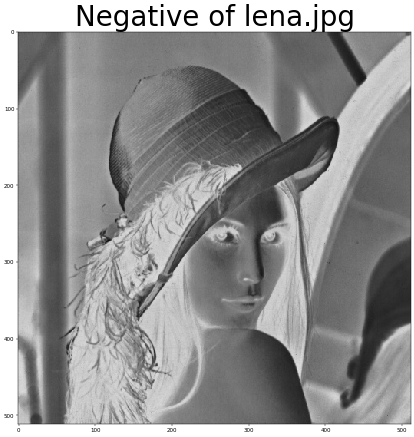

In [27]:
neg_lena = NegativeOfImage(lena,255)
plt.figure(figsize=[13,13],dpi = 40)
plt.imshow(neg_lena)
plt.title('Negative of lena.jpg', fontsize=50)

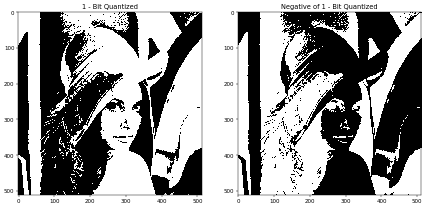

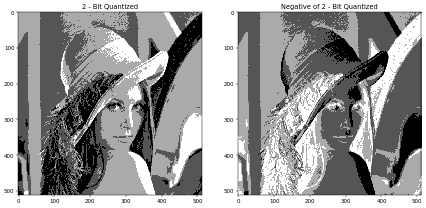

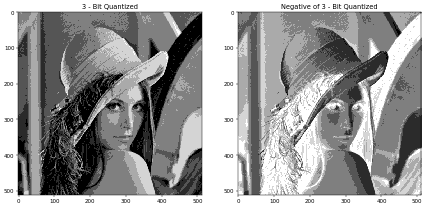

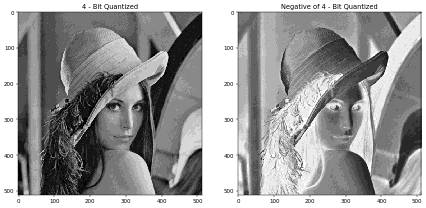

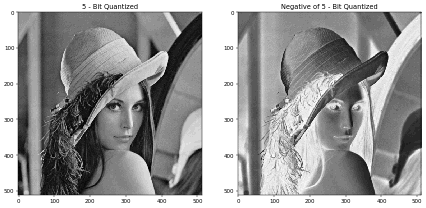

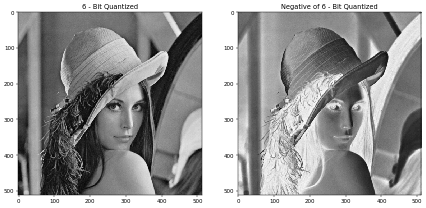

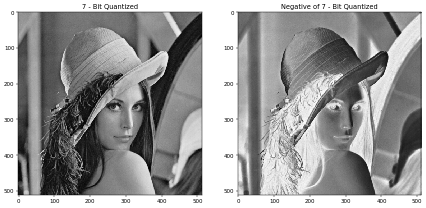

In [28]:
for k in range(1,8,1):
    bit_lena = BitQuantizeImage(lena, k)
    bit_neg_lena = NegativeOfImage(bit_lena, 255)
    fig = plt.figure(figsize=[13,13],dpi = 40)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(bit_lena)
    ax2.imshow(bit_neg_lena)
    ax1.title.set_text('%i - Bit Quantized'%k)
    ax2.title.set_text('Negative of %i - Bit Quantized'%k)

**Part 2** *Using the image gamma-corr.png, apply the Gamma Transform s = r^γ and vary γ.
Report your observations.*

In [29]:
def gammaTransform(image, gamma):
    """
    Returns an Image with the following transform, assuming 8 bit images as input
    newIntensity = ((oldIntensity/255)^gamma)*255
    """
    output = np.zeros(image.shape)
    output = np.floor(((image/255)**gamma)*255)
    output = output.astype('uint8')
    return output

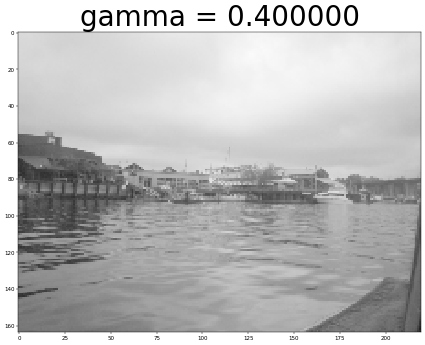

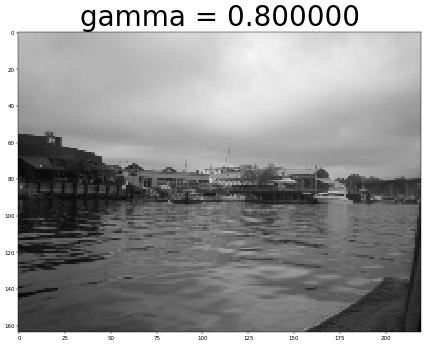

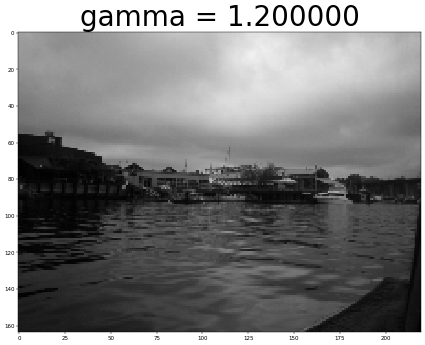

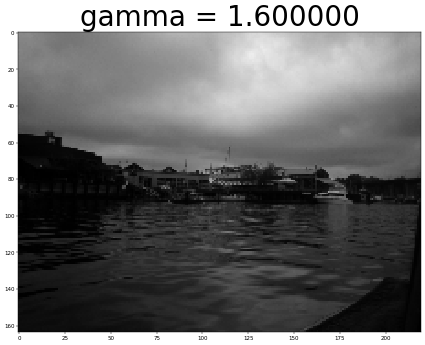

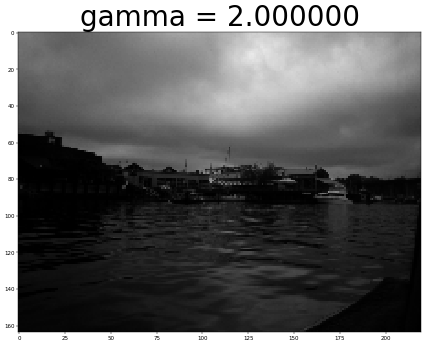

In [30]:
i=1
for gamma in range(4,21,4):
    output = gammaTransform(gammacorr, gamma/float(10))
    plt.figure(i,figsize=[13,13],dpi = 40)
    i = i+1
    plt.imshow(output)
    plt.title('gamma = %f'%(gamma/float(10)),fontsize = 50)

### Observations :-
* Increasing gamma beyond 1 pushes image to lower level intensities
* Image becomes darker in colour

**Part 3** *Write a function to implement a piecewise linear transform. The function takes an input image, coefficients K1,K2 and intervals a,b for each linear segment and produces the transformed output image.*

In [31]:
def piecewiseLinTransform(image, k1, k2, a, b):
    """
    Given an input image, it transforms the image linearly to fit some straight line 
    
    newPixelIntensity = k1*(oldPixelIntensity)+k2 for oldPixelintensity belonging to the range [a,b]
    """
    output = np.zeros(image.shape)
    if (len(image.shape)==2):
        for i in range(0, image.shape[0], 1):
            for j in range(0, image.shape[1], 1):
                if (image[i,j]<=b and image[i,j]>=a):
                    output[i,j] = k1*image[i,j]+k2
                elif (image[i,j]>b and image[i,j]<a):
                    output[i,j] = 0
    elif (len(image.shape)==3):
        for i in range(0, image.shape[0], 1):
            for j in range(0, image.shape[1], 1):
                for k in range(0, image.shape[2],1):
                    if (image[i,j,k]<=b and image[i,j,k]>=a):
                        output[i,j,k] = k1*image[i,j,k]+k2
                    elif (image[i,j,k]>b and image[i,j,k]<a):
                        output[i,j,k] = 0
    
    output = output.astype('uint8')
    return output

Text(0.5, 1.0, 'Transformation for Function 2')

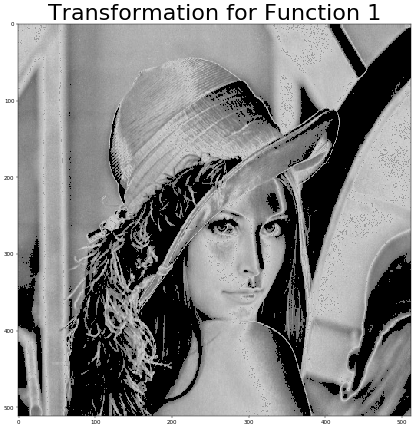

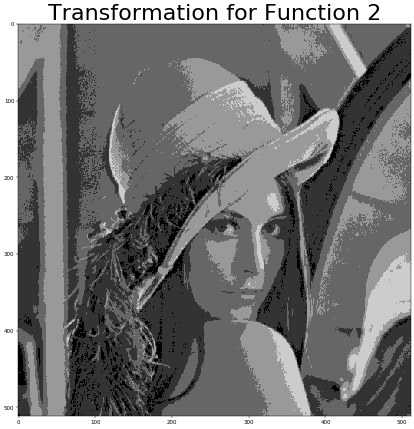

In [32]:
output1 = piecewiseLinTransform(lena,0.4/0.3,0,np.floor(0.3*255),np.floor(0.6*255)) + piecewiseLinTransform(lena,-1*0.4/0.2,2,np.floor(0.6*255),np.floor(0.8*255))
plt.figure(1,figsize=[13,13],dpi = 40)
plt.imshow(output1)
plt.title('Transformation for Function 1', fontsize=40)
output2 = piecewiseLinTransform(lena,0,0.2*255,np.floor(0.2*255),np.floor(0.4*255))+piecewiseLinTransform(lena,0,0.4*255,np.floor(0.4*255)+1,np.floor(0.6*255))+piecewiseLinTransform(lena,0,0.6*255,np.floor(0.6*255)+1,np.floor(0.8*255))+piecewiseLinTransform(lena,0,0.8*255,np.floor(0.8*255)+1,255)
plt.figure(2,figsize=[13,13],dpi = 40)
plt.imshow(output2)
plt.title('Transformation for Function 2', fontsize=40)

# Question 5

## Part 1

*What can you say about the histogram of a resulting image if we keep the MSB bits in the bitplane to 0?*

If image with intensity levels of $ L $ is limited to MSB = 0, the intensity range will be limited to $ round(L/2) $. So higher side of histogram , $ L/2-1, L/2 $ will not be there and image will appear darker

## Part 2

*What can you say about the histogram of a resulting image if we keep the LSB bits in the bitplane to 0?*

If image with intensity levels of $ L $ is limited to LSB = 0, the odd intensity values will become 0. Hence, the histogram will have discontinuities at odd values.


## Part 3
*Transmission is usually achieved through packets containing a start bit, a byte
of information and a stop bit. Baud rate is a common measure for digital data
transmission and is defined as number of bits transmitted per second. How much
time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over
a 56K baud link? Similarly, calculate the time required to transmit the same image
over a 3000K baud link.*

No. of bits required to represent a pixel = $ start + 8 bits(image) + stop = 10bpp $
<br>
Total no. of bits required for image = $ 10bpp * 512 * 512 = 2621440 $
<br>
Time taken = $ \frac{total no. of bits}{Baud Rate} $
<br>
For $ BaudRate = 56 X 1024 bps = 57344$ , Time taken = $45.714$ sec
<br>
For $ BaudRate = 3000 X 1024 bps = 3072000$ , Time taken = $0.8533$ sec

# Question 6

**Part 1** *Write a function histEqualization which takes a grayscale image im, and applies
histogram equalization on the entire image.*

In [33]:
def histEqualization(im):
    """
    """
    output = np.zeros(im.shape)
    hist, bins = np.histogram(im, np.arange(0,257,1))
    totPix = im.shape[0]*im.shape[1]
    prob = hist/totPix
    cdf = prob.cumsum()
    cdf_norm = (cdf-np.amin(cdf))*255/(np.amax(cdf)-np.amin(cdf))
    cdf_norm = cdf_norm.astype('uint8')
    flattened_op = np.round(cdf_norm[im.flatten()])
    output = np.reshape(flattened_op, im.shape)
    return output.astype('uint8')

**Part 2** *Display the input image and the resultant image side-by-side and provide suitable
explanation for the changes you observe for multiple input images.*

Text(0.5, 1.0, 'Histograms')

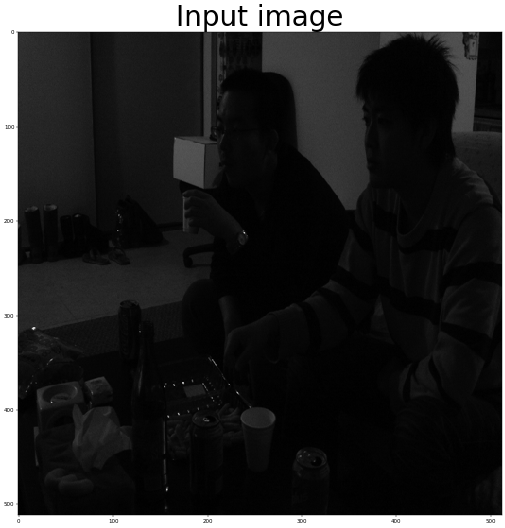

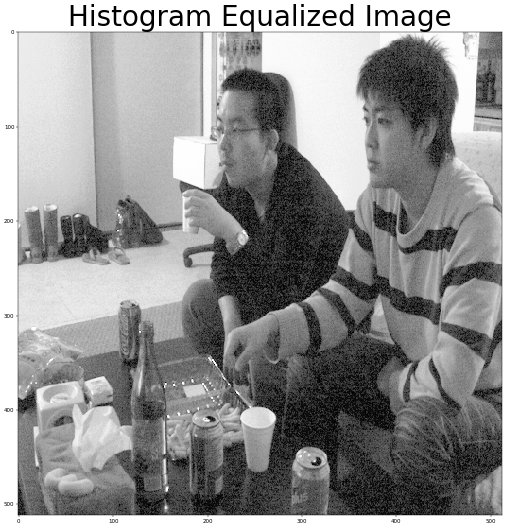

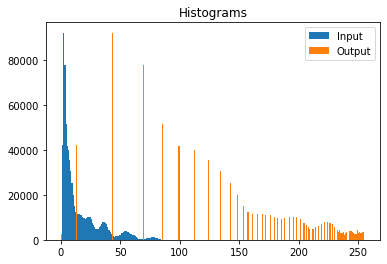

In [34]:
plt.figure(1,figsize=[16,16],dpi = 40)
plt.imshow(group)
plt.title('Input image', fontsize=50)
output = histEqualization(group)
plt.figure(2,figsize=[16,16],dpi = 40)
plt.imshow(output)
plt.title('Histogram Equalized Image', fontsize = 50)

plt.figure(3)
plt.hist(group.ravel(), 256, [0,256], label = 'Input')
plt.hist(output.ravel(), 256, [0,256], label = 'Output')
plt.legend(prop={'size': 10})
plt.title('Histograms')

### Observation :-
* We see that intensities in a picture with equalized histogram has equal probability of occurence.
* This implies that balancing out the intensity probability helps us differentiate more clearly between different regions of image.

**Part 3** *Write a function histMatching which takes an input image and a reference image
and applies histogram Matching on the input image by matching the histogram with
that of the reference image. Use eye.png and eyeref.png (converted to grayscale)
as the input and reference images respectively.*

In [35]:
def histMatching(image, ref):
    """
    Assume 8 bit greyscale
    """
    output = np.zeros(image.shape)
    hist_im, bins1 = np.histogram(image.flatten(), np.arange(0,256,1))
    hist_ref, bins2 = np.histogram(ref.flatten(), np.arange(0,256,1))
    cdf_im = hist_im.cumsum()/hist_im.sum()*255
    cdf_ref = hist_ref.cumsum()/hist_ref.sum()*255
    lut = np.zeros([256,1])
    for i in range(0,cdf_im.shape[0],1):
        imVal = cdf_im[i]
        lut[i] = np.searchsorted(cdf_ref,imVal)
    for i in range(0,output.shape[0],1):
        for j in range(0,output.shape[1],1):
            output[i,j] = lut[image[i,j]]
    return output

Text(0.5, 1.0, 'Histograms')

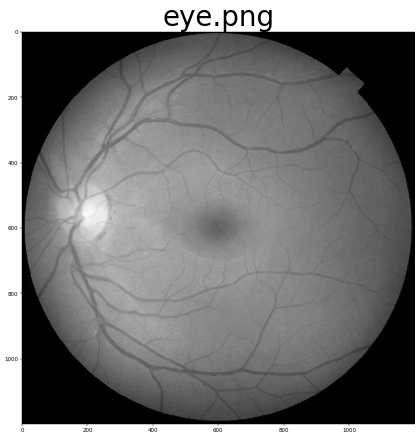

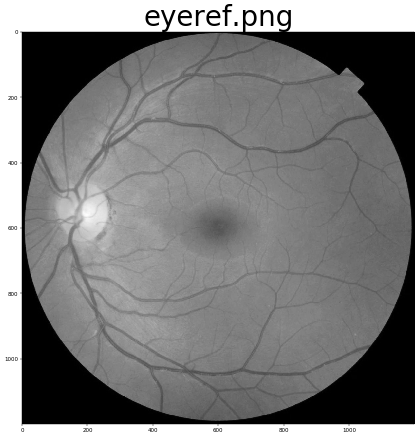

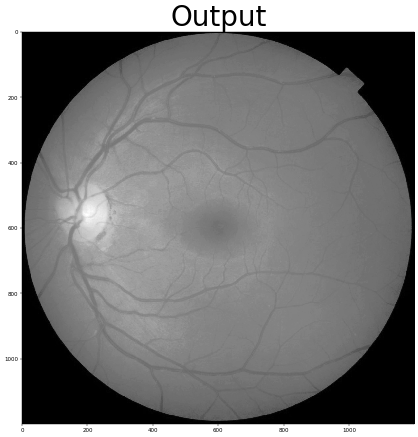

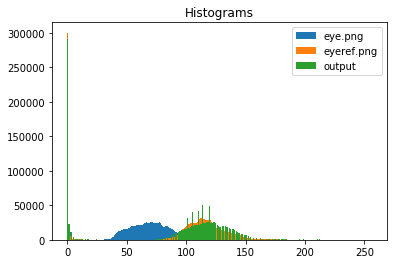

In [36]:
plt.figure(1,figsize=[13,13],dpi = 40)
plt.imshow(rgb2gray(eye), cmap=cm.gray)
plt.title('eye.png', fontsize=50)

plt.figure(2,figsize=[13,13],dpi = 40)
plt.imshow(rgb2gray(eyeref), cmap = cm.gray)
plt.title('eyeref.png', fontsize=50)
output = np.zeros(eye.shape)

output = histMatching(rgb2gray(eye), rgb2gray(eyeref))

plt.figure(3,figsize=[13,13],dpi = 40)
plt.imshow(output.astype('uint8'), cmap=cm.gray)
plt.title('Output', fontsize=50)

plt.figure(4)
plt.hist(rgb2gray(eye).ravel(), 256, [0,256], label = 'eye.png')
plt.hist(rgb2gray(eyeref).ravel(), 256, [0,256], label = 'eyeref.png')
plt.hist(output.ravel(), 256, [0,256], label = 'output')
plt.legend(prop={'size': 10})
plt.title('Histograms')

**Part 4** *You are provided with 4 images (part1.png, part2.png, part3.png, part4.png)
with different contrast levels which correspond to four quadrants of canyon.png as
shown in Figure 5. Retrieve the original image(converted to grayscale) using these
four images(converted to grayscale) as closely as possible.*

Text(0.5, 1.0, 'Output')

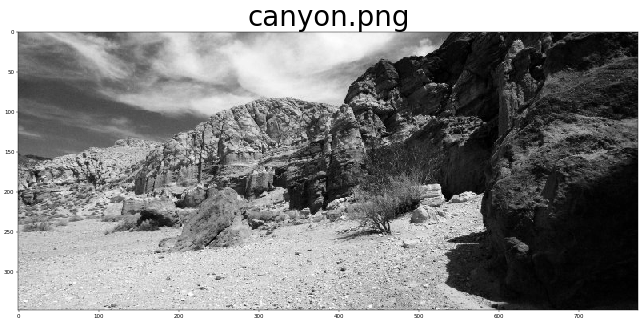

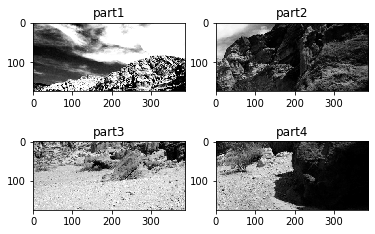

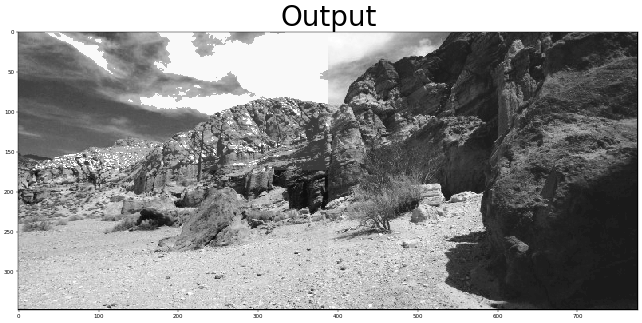

In [37]:
plt.figure(1,figsize=[20,20],dpi = 40)
plt.imshow(rgb2gray(canyon), cmap=cm.gray)
plt.title('canyon.png', fontsize = 50)

fig = plt.figure(2)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.imshow(rgb2gray(part1), cmap=cm.gray)
ax2.imshow(rgb2gray(part2), cmap=cm.gray)
ax3.imshow(rgb2gray(part3), cmap=cm.gray)
ax4.imshow(rgb2gray(part4), cmap=cm.gray)
ax1.title.set_text('part1')
ax2.title.set_text('part2')
ax3.title.set_text('part3')
ax4.title.set_text('part4')

fin_im = np.zeros([part1.shape[0]+part2.shape[0]+1,part1.shape[1]+part3.shape[1]+1])
fin_im[0:part1.shape[0],0:part1.shape[1]] = histMatching(rgb2gray(part1),rgb2gray(canyon[0:part1.shape[0],0:part1.shape[1],:]))
fin_im[0:part1.shape[0], part1.shape[1]+1:part1.shape[1]+part3.shape[1]] = linContrastStretching(histMatching(rgb2gray(part2),rgb2gray(canyon[0:part1.shape[0], part1.shape[1]+1:part1.shape[1]+part3.shape[1],:])),28,255)
fin_im[part1.shape[0]:part1.shape[0]+part2.shape[0], 0:part1.shape[1]] = histMatching(rgb2gray(part3),rgb2gray(canyon[part1.shape[0]+1:part1.shape[0]+part2.shape[0]+1, 0:part1.shape[1],:]))
fin_im[part1.shape[0]:part1.shape[0]+part2.shape[0], part1.shape[1]+1:part1.shape[1]+part3.shape[1]] = linContrastStretching(histMatching(rgb2gray(part4),rgb2gray(canyon[part1.shape[0]+1:part1.shape[0]+part2.shape[0]+1, part1.shape[1]+1:part1.shape[1]+part3.shape[1],:])),26,255)

plt.figure(3,figsize=[20,20],dpi = 40)
plt.imshow(fin_im, cmap = cm.gray)
plt.title('Output',fontsize=50)

# Question 7

**Part 1** *Choose an image of your choice and apply histogram equalization to it. Apply
histogram equalization to the resulting image and compare the two images. What
are your observations?*

Text(0.5, 1.0, 'Histogram Equalization on \n Histogram Equalized image')

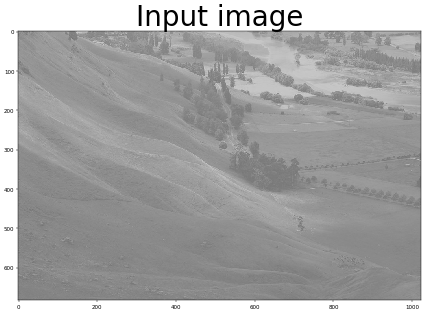

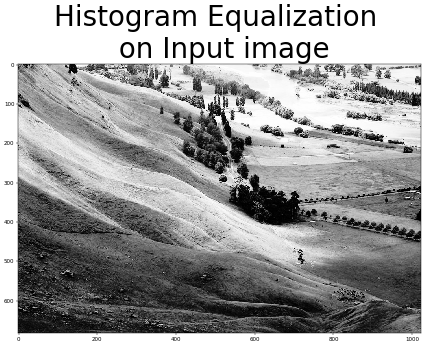

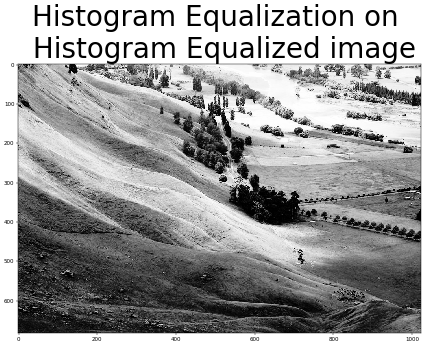

In [38]:
histeq = histEqualization(histuneq)
output = histEqualization(histeq)

plt.figure(1,figsize=[13,13],dpi = 40)
plt.imshow(histuneq, cmap = cm.gray)
plt.title('Input image', fontsize=50)

plt.figure(2,figsize=[13,13],dpi = 40)
plt.imshow(histeq, cmap = cm.gray)
plt.title('Histogram Equalization \n on Input image', fontsize=50)

plt.figure(3,figsize=[13,13],dpi = 40)
plt.imshow(output, cmap = cm.gray)
plt.title('Histogram Equalization on \n Histogram Equalized image', fontsize=50)


## Observations :-
* No change in histogram equalization after applying multiple times
* Reason - Histogram equalization is idempotent(does not change after repeated application), because after after equalization, we fix the probability of intensity.

**Part 2** *Pick the following combination of images and perform histogram transformation on
them*

**a)** *Similar Histograms*

In [39]:
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/divine.jpg')
divine = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/divine_similar.jpg')
divinesimilar = io.imread(file)

Text(0.5, 1.0, 'Matched Image 1 to Image 2')

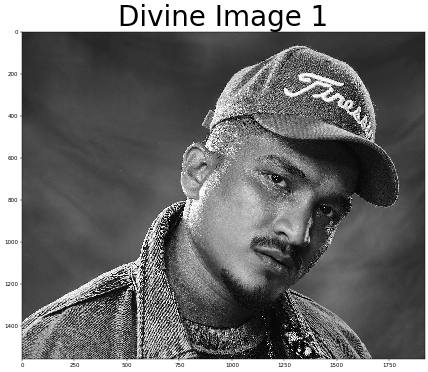

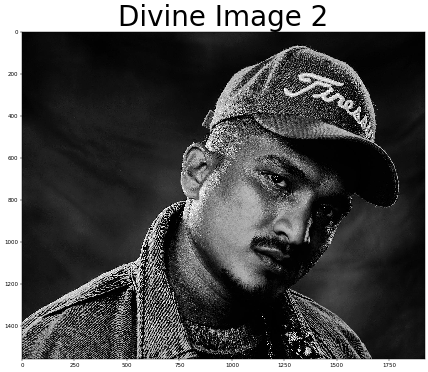

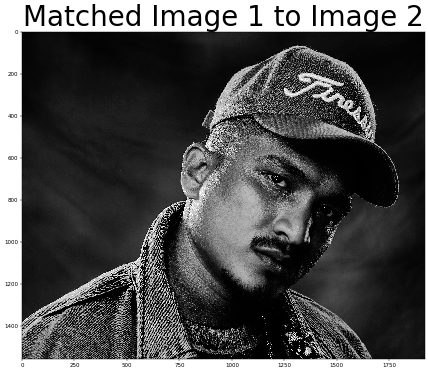

In [40]:
plt.figure(1,figsize=[13,13],dpi = 40)
plt.imshow(divine)
plt.title('Divine Image 1', fontsize=50)
plt.figure(2,figsize=[13,13],dpi = 40)
plt.imshow(divinesimilar,cmap = cm.gray)
plt.title('Divine Image 2', fontsize=50)
output = np.zeros(rgb2gray(divine).shape)
output = histMatching(rgb2gray(divine), rgb2gray(divinesimilar))
plt.figure(3,figsize=[13,13],dpi = 40)
plt.imshow(output.astype('uint8'),cmap=cm.gray)
plt.title('Matched Image 1 to Image 2', fontsize=50)

Text(0.5, 1.0, 'Histograms')

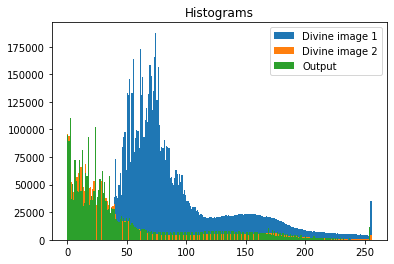

In [42]:
plt.figure(1)
plt.hist(divine.ravel(), 256, [0,256], label = 'Divine image 1')
plt.hist(divinesimilar.ravel(), 256, [0,256],label = 'Divine image 2')
plt.hist(output.ravel(), 256, [0,256], label = 'Output')
plt.legend(prop={'size': 10})
plt.title('Histograms')

**b)** *Light -> Dark Image*

In [43]:
#Assets for Question 7, Part 2
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/snoopdogglight.jpg')
snoopdogglight = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/snoopdoggdark.jpg')
snoopdoggdark = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/snoopdogglowctr.jpg')
snoopdogglowctr = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/snoopdogghighctr.jpg')
snoopdogghighctr = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/lowcontr.png')
lowcontr = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/lightroom.jpg')
lightroom = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/darkroom.jpg')
darkroom = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/underexposed.jpg')
underexposed = io.imread(file)
file = os.path.join(os.getcwd(), 'A1_resources/DIP_2019_A1/overexposed.jpg')
overexposed = io.imread(file)

lightimage1 = lightroom
darkimage1 = darkroom
lightimage2 = overexposed
darkimage2 = underexposed

Text(0.5, 1.0, 'Light to Dark Matching')

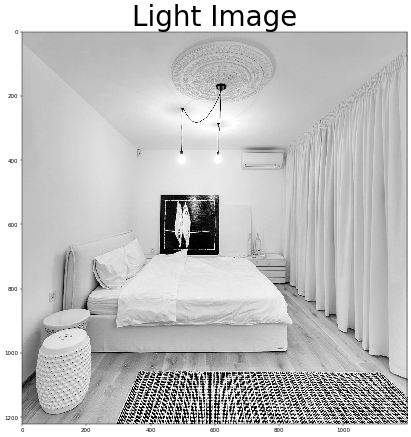

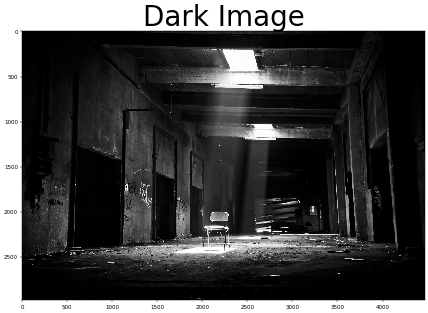

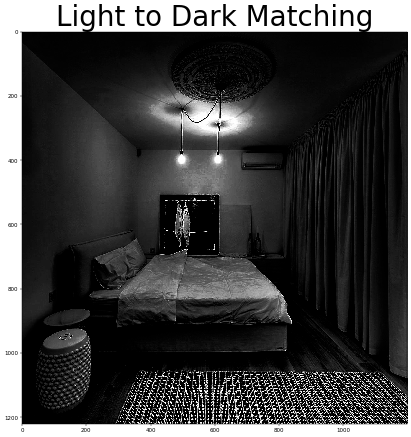

In [44]:
plt.figure(1,figsize=[13,13],dpi = 40)
plt.imshow(rgb2gray(lightimage1),cmap=cm.gray)
plt.title('Light Image', fontsize=50)

plt.figure(2,figsize=[13,13],dpi = 40)
plt.imshow(rgb2gray(darkimage1),cmap=cm.gray)
plt.title('Dark Image', fontsize=50)

output = np.zeros(rgb2gray(lightimage1).shape)
output = histMatching(rgb2gray(lightimage1), rgb2gray(darkimage1))
plt.figure(3,figsize=[13,13],dpi = 40)
plt.imshow(output.astype('uint8'),cmap=cm.gray)
plt.title('Light to Dark Matching', fontsize=50)

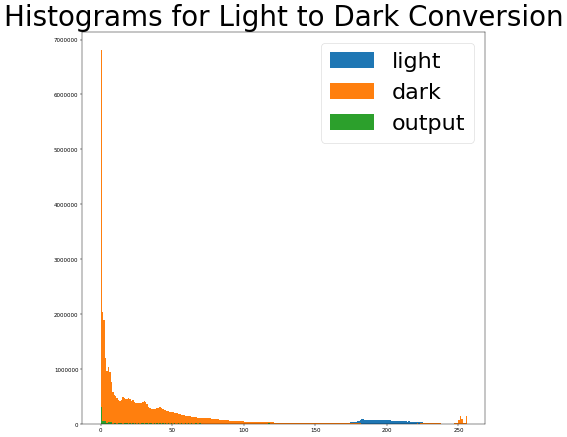

In [45]:
plt.figure(1,figsize=[13,13],dpi = 40)
plt.hist(lightimage1.ravel(), 256, [0,256], label = 'light')
plt.hist(darkimage1.ravel(), 256, [0,256], label = 'dark')
plt.hist(output.ravel(), 256, [0,256], label = 'output')
plt.title('Histograms for Light to Dark Conversion', fontsize=50)
plt.legend(prop={'size': 40})


**c)** *Light -> Dark Image*

Text(0.5, 1.0, 'Dark to Light Matching')

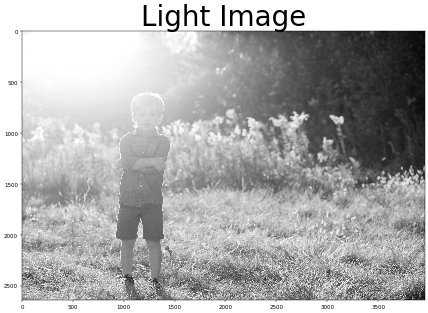

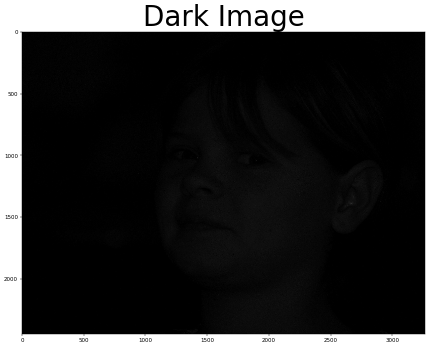

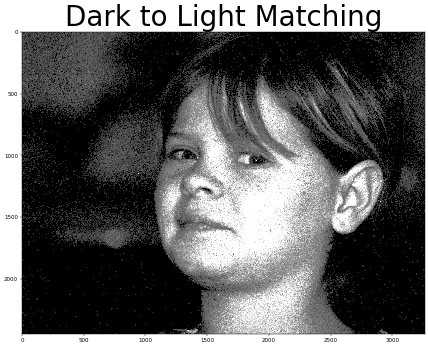

In [46]:
plt.figure(1,figsize=[13,13],dpi = 40)
plt.imshow(rgb2gray(lightimage2),cmap=cm.gray)
plt.title('Light Image', fontsize=50)

plt.figure(2,figsize=[13,13],dpi = 40)
plt.imshow(rgb2gray(darkimage2),cmap=cm.gray)
plt.title('Dark Image', fontsize=50)

output = np.zeros(rgb2gray(darkimage2).shape)
output = histMatching(rgb2gray(darkimage2), rgb2gray(lightimage2))
plt.figure(3,figsize=[13,13],dpi = 40)
plt.imshow(output.astype('uint8'),cmap=cm.gray)
plt.title('Dark to Light Matching', fontsize=50)

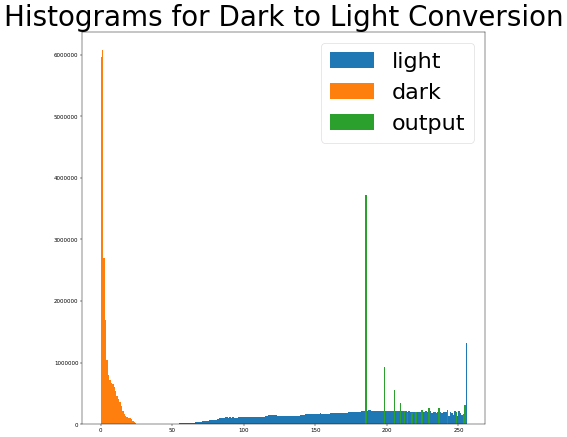

In [47]:
plt.figure(1,figsize=[13,13],dpi = 40)
plt.hist(lightimage2.ravel(), 256, [0,256], label = 'light')
plt.hist(darkimage2.ravel(), 256, [0,256], label = 'dark')
plt.hist(output.ravel(), 256, [0,256], label = 'output')
plt.title('Histograms for Dark to Light Conversion',fontsize=50)
plt.legend(prop={'size': 40})